In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
f = open(u'H:\\Видеозаписи\\DataLectures\\DataBase2.csv')
data = pd.read_csv(f, sep=';')

In [3]:
data_train = data.loc[ data['DATA_TYPE'] == 'TRAIN' ]
data_test = data.loc[ data['DATA_TYPE'] == 'TEST ' ]
data_test.head()

,DATA_TYPE,POLICY_ID,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_IS_RENEWED,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP,POLICY_BRANCH,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,...,POLICY_PRV_CLM_GLT_N,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_YEARS_RENEWED_N,POLICY_DEDUCT_VALUE,CLIENT_REGISTRATION_REGION,POLICY_PRICE_CHANGE
9,TEST,10,2,2,0,53,6,Санкт-Петербург,56,37,...,0,0,1,0,0,0,1,15000.0,Санкт-Петербург,-0.04
11,TEST,12,1,1,0,53,6,Москва,53,35,...,0,0,0,0,0,0,1,0.0,Москва,0.06
12,TEST,13,1,1,0,54,6,Москва,30,8,...,0,1,1,0,2,0,1,0.0,Москва,-0.29
21,TEST,22,1,1,0,52,6,Санкт-Петербург,61,25,...,0,0,0,0,0,0,3,0.0,Ленинградская,0.43
36,TEST,37,12,12,0,1,4,Санкт-Петербург,36,18,...,0,1,1,0,0,0,7,0.0,Санкт-Петербург,-0.01


In [54]:
pd.crosstab(data_train.POLICY_SALES_CHANNEL_GROUP, data_train.POLICY_BRANCH).head()

POLICY_BRANCH,0,1
POLICY_SALES_CHANNEL_GROUP,,
1,3844,3827
2,86,71
3,590,2311
4,248,3097
5,8249,4552


In [62]:
print(data_train.POLICY_SALES_CHANNEL_GROUP,data_train.POLICY_BRANCH, data_train.POLICY_SALES_CHANNEL_GROUP, data_train.POLICY_BRANCH)

0        1
1        5
2        6
3        5
4        6
5        4
6        6
7        1
8        6
10       5
13       6
14       6
15       6
16       6
17       6
18       6
19       4
20       6
22       4
23       6
24       6
25       6
26       6
27       5
28       5
29       6
30       4
31       6
32       1
33       5
        ..
95316    6
95317    6
95318    4
95321    1
95322    5
95324    5
95325    6
95326    6
95327    5
95328    5
95329    6
95330    6
95331    6
95333    6
95334    6
95335    6
95336    5
95337    5
95338    6
95339    6
95340    1
95342    6
95343    5
95345    6
95346    1
95347    6
95348    5
95349    5
95350    6
95351    6
Name: POLICY_SALES_CHANNEL_GROUP, Length: 76407, dtype: int64 0        0
1        0
2        0
3        0
4        1
5        1
6        0
7        1
8        0
10       1
13       0
14       0
15       1
16       0
17       0
18       1
19       1
20       1
22       1
23       0
24       0
25       1
26       0
27       1
28 

In [4]:
Y = data_train['POLICY_IS_RENEWED']

In [5]:
data_train=data_train.drop(('POLICY_ID'), axis=1)

In [6]:
data_train=data_train.drop(('POLICY_IS_RENEWED'), axis=1)

In [7]:
data_train=data_train.drop(('DATA_TYPE'), axis=1)

In [8]:
data_train.POLICY_PRICE_CHANGE = pd.to_numeric(data_train.POLICY_PRICE_CHANGE)

In [9]:
categorical_columns = [c for c in data_train.columns if data_train[c].dtype.name == 'object']
numerical_columns   = [c for c in data_train.columns if data_train[c].dtype.name != 'object']

In [10]:
data_train[categorical_columns].describe()

,POLICY_BRANCH,VEHICLE_MAKE,VEHICLE_MODEL,POLICY_INTERMEDIARY,INSURER_GENDER,POLICY_CLM_N,POLICY_CLM_GLT_N,POLICY_PRV_CLM_N,POLICY_PRV_CLM_GLT_N,CLAIM_AVG_ACC_ST_PRD,POLICY_YEARS_RENEWED_N,CLIENT_REGISTRATION_REGION
count,76407,76407,76407,76407,76407,76407,76407,76407,76407,76407,76407,76407
unique,2,80,525,1321,2,7,7,7,7,639,12,83
top,Москва,Kia,RAV4,N,M,0,0,0,0,0,0,Санкт-Петербург
freq,40168,8754,3301,16337,48307,54298,57688,35335,38137,59753,26336,30717


In [11]:
data_describe = data_train.describe(include=[object])
for c in categorical_columns:
    data_train[c] = data_train[c].fillna(data_describe[c]['top'])

In [12]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print (binary_columns, nonbinary_columns)

['POLICY_BRANCH', 'INSURER_GENDER'] ['VEHICLE_MAKE', 'VEHICLE_MODEL', 'POLICY_INTERMEDIARY', 'POLICY_CLM_N', 'POLICY_CLM_GLT_N', 'POLICY_PRV_CLM_N', 'POLICY_PRV_CLM_GLT_N', 'CLAIM_AVG_ACC_ST_PRD', 'POLICY_YEARS_RENEWED_N', 'CLIENT_REGISTRATION_REGION']


In [13]:
for c in binary_columns[0:]:
    top = data_describe[c]['top']
    top_items = data_train[c] == top
    data_train.loc[top_items, c] = 0
    data_train.loc[np.logical_not(top_items), c] = 1

In [14]:
data_nonbinary = pd.get_dummies(data_train[nonbinary_columns])
print (data_nonbinary.columns)

Index(['VEHICLE_MAKE_<Пусто>', 'VEHICLE_MAKE_Acura', 'VEHICLE_MAKE_Alfa Romeo',
       'VEHICLE_MAKE_Audi', 'VEHICLE_MAKE_BMW', 'VEHICLE_MAKE_BYD',
       'VEHICLE_MAKE_Bentley', 'VEHICLE_MAKE_Bogdan',
       'VEHICLE_MAKE_Brilliance', 'VEHICLE_MAKE_Cadillac',
       ...
       'CLIENT_REGISTRATION_REGION_Ульяновская',
       'CLIENT_REGISTRATION_REGION_Хабаровский',
       'CLIENT_REGISTRATION_REGION_Хакасия',
       'CLIENT_REGISTRATION_REGION_Ханты-Мансийский Автономный округ - Югра',
       'CLIENT_REGISTRATION_REGION_Челябинская',
       'CLIENT_REGISTRATION_REGION_Чеченская',
       'CLIENT_REGISTRATION_REGION_Чувашская Республика -',
       'CLIENT_REGISTRATION_REGION_Чукотский',
       'CLIENT_REGISTRATION_REGION_Ямало-Ненецкий',
       'CLIENT_REGISTRATION_REGION_Ярославская'],
      dtype='object', length=2688)


In [15]:
data_numerical = data_train[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()
data_numerical.describe()

,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,VEHICLE_ENGINE_POWER,VEHICLE_IN_CREDIT,VEHICLE_SUM_INSURED,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,POLICY_HAS_COMPLAINTS,POLICY_DEDUCT_VALUE,POLICY_PRICE_CHANGE
count,7.640700e+04,7.640700e+04,7.640700e+04,7.640700e+04,7.640700e+04,7.640700e+04,7.640700e+04,7.640700e+04,7.640700e+04,7.640700e+04,7.640700e+04,7.640700e+04,7.640700e+04,7.640700e+04,7.640700e+04
mean,3.200282e-15,-4.230603e-15,-7.468457e-16,-1.769577e-15,-9.476716e-17,-1.613131e-16,-1.994084e-15,2.015850e-15,1.856889e-16,-4.318837e-15,3.127659e-15,-2.846885e-15,-3.610073e-15,-5.455403e-16,-1.346274e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.730366e+00,-1.722320e+00,-3.316435e+00,-2.618019e+00,-2.299901e+00,-1.750199e-01,-2.859027e+00,-6.859230e-01,-1.432033e+00,-6.178201e-01,-1.105773e+00,-3.028159e-02,-8.444466e-02,-5.775672e-01,-1.246675e+00
25%,-8.472508e-01,-8.400286e-01,1.858454e-01,-8.244024e-02,-8.070509e-01,-1.353427e-01,-5.736631e-01,-6.859230e-01,-6.135227e-01,-6.178201e-01,-1.105773e+00,-3.028159e-02,-8.444466e-02,-5.775672e-01,-1.548110e-01
50%,3.586461e-02,4.226298e-02,3.287956e-01,5.514544e-01,-1.539288e-01,-1.055848e-01,-1.463188e-01,-6.859230e-01,-2.502116e-01,-6.178201e-01,9.043332e-01,-3.028159e-02,-8.444466e-02,-5.775672e-01,8.486650e-02
75%,9.189800e-01,9.245546e-01,4.002707e-01,5.514544e-01,6.857996e-01,-8.078655e-02,3.181860e-01,1.457870e+00,2.695888e-01,1.618573e+00,9.043332e-01,-3.028159e-02,-8.444466e-02,3.805021e-01,1.514436e-01
max,1.507724e+00,1.512749e+00,1.115022e+00,1.819244e+00,4.044713e+00,9.818677e+00,3.430135e+01,1.457870e+00,1.244006e+01,1.618573e+00,9.043332e-01,3.302294e+01,1.184192e+01,1.100290e+01,8.000400e+01


In [16]:
data = pd.concat((data_numerical, data_train[binary_columns]), axis=1)
data = pd.DataFrame(data, dtype=float)
print (data.shape)
print (data.columns)

(76407, 17)
Index(['POLICY_BEGIN_MONTH', 'POLICY_END_MONTH', 'POLICY_SALES_CHANNEL',
       'POLICY_SALES_CHANNEL_GROUP', 'POLICY_MIN_AGE',
       'POLICY_MIN_DRIVING_EXPERIENCE', 'VEHICLE_ENGINE_POWER',
       'VEHICLE_IN_CREDIT', 'VEHICLE_SUM_INSURED', 'CLIENT_HAS_DAGO',
       'CLIENT_HAS_OSAGO', 'POLICY_COURT_SIGN', 'POLICY_HAS_COMPLAINTS',
       'POLICY_DEDUCT_VALUE', 'POLICY_PRICE_CHANGE', 'POLICY_BRANCH',
       'INSURER_GENDER'],
      dtype='object')


In [17]:
#X = data.drop(('POLICY_IS_RENEWED'), axis=1)  # Выбрасываем столбец 'class'.

X = data.copy()
feature_names = X.columns
print (feature_names)

Index(['POLICY_BEGIN_MONTH', 'POLICY_END_MONTH', 'POLICY_SALES_CHANNEL',
       'POLICY_SALES_CHANNEL_GROUP', 'POLICY_MIN_AGE',
       'POLICY_MIN_DRIVING_EXPERIENCE', 'VEHICLE_ENGINE_POWER',
       'VEHICLE_IN_CREDIT', 'VEHICLE_SUM_INSURED', 'CLIENT_HAS_DAGO',
       'CLIENT_HAS_OSAGO', 'POLICY_COURT_SIGN', 'POLICY_HAS_COMPLAINTS',
       'POLICY_DEDUCT_VALUE', 'POLICY_PRICE_CHANGE', 'POLICY_BRANCH',
       'INSURER_GENDER'],
      dtype='object')


In [18]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from pandas import read_csv, DataFrame
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA


C:\Users\1\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\1\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 11)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))
print (err_train, err_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [21]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=11)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))
print (err_train, err_test)

0.0 0.31378964358940803


In [42]:
rf.score(X_test, y_test)

0.686210356410592

In [49]:
from sklearn.metrics import accuracy_score


accuracy: 0.686210356410592


In [51]:
print("precision:",metrics.precision_score(y_test, rf.predict(X_test)))
print("recall:",metrics.recall_score(y_test, rf.predict(X_test)))
print ("accuracy:",accuracy_score(y_test, rf.predict(X_test)))
print("roc_auc:",roc_auc_score(y_test, rf.predict(X_test)))
print("gini:",2*roc_auc_score(y_test, rf.predict(X_test))-1)

precision: 0.7039941329121066
recall: 0.8650953206239168
accuracy: 0.686210356410592
roc_auc: 0.6238279615593108
gini: 0.2476559231186215


In [29]:
rf.predict(X_train)

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [31]:
from sklearn import ensemble
gbt = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=11)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))
print (err_train, err_test)

0.30691421733602575 0.3089473454608908


In [32]:
from sklearn.metrics import roc_auc_score
2*roc_auc_score(y_test, gbt.predict(X_test))-1

0.2283228799272985

In [39]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print (err_train, err_test)

0.3373532271333483 0.34533001788596607


In [41]:
from sklearn.grid_search import GridSearchCV
C_array = np.logspace(-5, 2, num=8)
gamma_array = np.logspace(-5, 2, num=8)
degree_array = [2, 3, 4]
svc = SVC(kernel='poly')
grid = GridSearchCV(svc, param_grid={'C': C_array, 'gamma': gamma_array, 'degree': degree_array})
grid.fit(X_train, y_train)
print ('CV error    = ', 1 - grid.best_score_)
print ('best C      = ', grid.best_estimator_.C)
print ('best gamma  = ', grid.best_estimator_.gamma)
print ('best degree = ', grid.best_estimator_.degree)

KeyboardInterrupt: 

In [ ]:
svc = SVC(kernel='rbf', C=grid.best_estimator_.C, gamma=grid.best_estimator_.gamma)
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print err_train, err_test

In [35]:
svc = SVC(kernel='poly', C=grid.best_estimator_.C, 
          gamma=grid.best_estimator_.gamma, degree=grid.best_estimator_.degree)
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print (err_train, err_test)

NameError: name 'SVC' is not defined

In [23]:
models = []
models.append(RandomForestClassifier(n_estimators=165, max_depth=4, criterion='entropy'))
models.append(GradientBoostingClassifier(max_depth =4))
models.append(KNeighborsClassifier(n_neighbors=20))
models.append(GaussianNB())

In [52]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))

Feature importances:
 1. feature 'POLICY_PRICE_CHANGE' (0.1688)
 2. feature 'VEHICLE_SUM_INSURED' (0.1604)
 3. feature 'POLICY_MIN_AGE' (0.1257)
 4. feature 'VEHICLE_ENGINE_POWER' (0.1214)
 5. feature 'POLICY_MIN_DRIVING_EXPERIENCE' (0.1202)
 6. feature 'POLICY_SALES_CHANNEL' (0.0539)
 7. feature 'POLICY_END_MONTH' (0.0507)
 8. feature 'POLICY_BEGIN_MONTH' (0.0496)
 9. feature 'POLICY_DEDUCT_VALUE' (0.0470)
10. feature 'INSURER_GENDER' (0.0223)
11. feature 'VEHICLE_IN_CREDIT' (0.0193)
12. feature 'POLICY_SALES_CHANNEL_GROUP' (0.0193)
13. feature 'POLICY_BRANCH' (0.0136)
14. feature 'CLIENT_HAS_OSAGO' (0.0127)
15. feature 'CLIENT_HAS_DAGO' (0.0124)
16. feature 'POLICY_HAS_COMPLAINTS' (0.0024)
17. feature 'POLICY_COURT_SIGN' (0.0005)


ValueError: shape mismatch: objects cannot be broadcast to a single shape

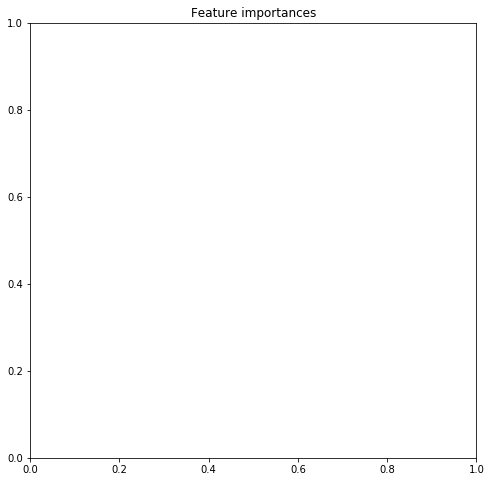

In [33]:
d_first = 20
plt.figure(figsize=(8, 8))
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(feature_names)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

In [28]:
from sklearn.metrics import roc_auc_score
2*roc_auc_score(y_test, rf.predict(X_test))-1

0.2476559231186215

In [26]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, rf.predict(X_train))

1.0